In [638]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import OneHotEncoder
from test import *

In [944]:
#now we do it for football.csv file
df = pd.read_csv('./titatnic.csv')
df=df.drop('Passengerid',axis=1)
df=df.dropna(axis=0)
df.corr()
y = df.pop('2urvived').to_numpy()
df=df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1)
X = df.to_numpy() 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])

In [59]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [60]:
layer_sizes=[7,4,3,1]
weights=[]
biases=[]
for i in range(1, len(layer_sizes)):
    weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
    biases.append(np.zeros(shape=(layer_sizes[i],1))) 

In [61]:
weights[0].T.shape,weights[1].T.shape,weights[2].T.shape

((7, 4), (4, 3), (3, 1))

In [448]:
layers=3
weights = []
biases = []
for i in range(1, len(layer_sizes)):
    weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
    biases.append(np.zeros(shape=(layer_sizes[i],1))) 
z = [0] * layers
a = [0] * layers

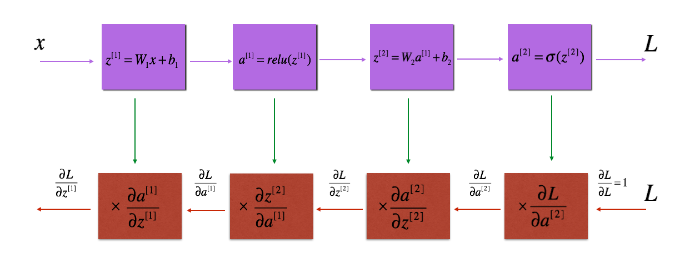

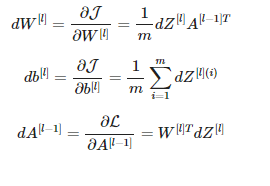

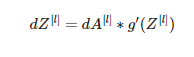

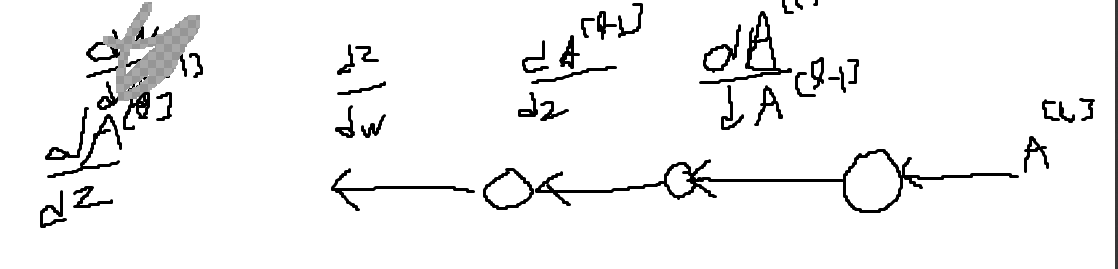

In [1264]:
class NeuralNet:
    def __init__(self,layer_sizes, learning_rate,alpha=0.01):
        self.layers=len(layer_sizes)-1
        self.weights = []
        self.biases = []
        # for i in range(1,self.layers+1):
        #     self.weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
        #     self.biases.append(np.zeros(shape=(layer_sizes[i],1))) 
        for i in range(1, self.layers + 1):
            # Xavier initialization: weights are initialized with a variance of 2 / (n_in + n_out)
            n_in, n_out = layer_sizes[i - 1], layer_sizes[i]
            xavier_stddev = np.sqrt(2.0 / (n_in + n_out))
            self.weights.append(np.random.randn(n_out, n_in) * xavier_stddev)  # Normal distribution
            self.biases.append(np.zeros((n_out, 1)))

        self.learning_rate = learning_rate
        #z and a start from layer 1 to self.layers
        self.z = [0] * self.layers
        self.a = [0] * self.layers
        #print(a)
        self.alpha=alpha
    def forward(self,X):
        for i in range(self.layers):
            #print(i)
            if i==0:
                #print(self.weights[i].shape,X.shape,self.biases[i].shape)
                self.z[i],self.a[i]=self.linear_forward(X,self.weights[i],self.biases[i],'relu')
            elif i==self.layers-1:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'sigmoid')
                #self.a[i]=self.z[i]
            else:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'relu')
            #if i!=0:
                #print(self.weights[i].shape,self.a[i-1].shape,self.biases[i].shape)
            #print(self.z[i].shape)
        return self.a[-1]
    def backward_propogate(self,Y,X):
        
        gradA=[0]*self.layers
        gradb=[0]*self.layers
        gradW=[0]*self.layers
        layers=self.layers
        Y=Y.reshape(self.a[-1].shape)
        epsilon = 1e-8
        dJA = (np.divide(1 - Y, 1 - self.a[-1] + epsilon)-(np.divide(Y, self.a[-1] + epsilon)) )
        layers-=1
       # print(dJA)
        # y - 1/yhat - 1-y/1-yhat
        ##print(dJA.shape,self.a[self.layers-1].shape)
        #print(layers)
       # print(gradA)
        gradA[layers-1], gradW[layers], gradb[layers] = self.linear_backward(dJA=dJA, Z=self.z[layers],A_prev=self.a[layers-1],W=self.weights[layers],b=self.biases[layers],activation='sigmoid')
        #print(gradA[layers-1])
        for l in reversed(range(layers)):
            #print(l)
            if l==0:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],X,self.weights[l],self.biases[l] , activation = "relu")
            else:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],self.a[l-1],self.weights[l],self.biases[l] , activation = "relu")
            #print(gradA[l-1])
            gradA[l-1] = dA_prev_temp
            gradW[l] = dW_temp
            gradb[l] = db_temp
        #print(gradA)
        #gradW = self.clip_gradients(gradW, 1.0)
        #gradb = self.clip_gradients(gradb, 1.0)
        return gradW,gradb
    
    def clip_gradients(self, grads,clip_value):
        clipped_grads = []
        for grad in grads:
            clipped_grads.append(np.clip(grad, -clip_value, clip_value))
        return clipped_grads

    def optimize(self, gradW, gradb):
        # Clip gradients
        #print(self.layers)
        # Update weights and biases with clipped gradients
        for l in range(self.layers):
            print(l)
            self.weights[l] -= self.learning_rate * gradW[l]
            self.biases[l] -= self.learning_rate * gradb[l]

        return self.weights, self.biases
    
    def predict(self,X):
        a=self.a.copy()
        z=self.z.copy()
        weights=self.weights.copy()
        biases=self.biases.copy()
        for i in range(self.layers):
            #print(weights[i].shape,X.shape,biases[i].shape)
            if i==0:
                z[i],a[i]=self.linear_forward(X,weights[i],biases[i],'relu')
            elif i==self.layers-1:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'sigmoid')
            else:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'relu')
            #print(weights[i].shape,a[i-1].shape,biases[i].shape)
        return a[-1]
    def linear_backward(self,dJA,Z,A_prev,W,b, activation):
        m=A_prev.shape[1]
        #dJ/dZ = dJ/dA * dA/dZ
        #print(f"dJA          Z       A_prev      W      b")
       # print(dJA,Z,A_prev,W,b)
        #print(dJA)
        
        if activation == "relu":
            dJZ = np.array(dJA, copy=True)
            #dA/dZ Z>0 =1 else 0
            dJZ[Z <= 0] = 0
        elif activation == "sigmoid":
            s=1/(1+np.exp(-Z))
            dAZ=s*(1-s)
            dJZ = dJA*dAZ
        elif activation == "leaky_relu":
            dJZ = dJA * self.leaky_relu_derivative(Z, self.alpha)
        elif activation=='':
            dJZ=dJA
        #print(dJZ.shape,dJA.shape)
        #Z= WA+B
        #dZ/dW = A
        #dJ/dW=dZ/dW * dL/dZ
        #1/m to stabalize
        print(dJZ.shape,A_prev.T.shape)
        dJW=(1/m) * np.dot(dJZ, A_prev.T)
        #print("dJW = dJZ * A[l-1]")
        #print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
        #print(f"W = {W.shape}")
        #dZ/db = 1
        #dJ/db=dJ/dZ *dZ/db
        dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
        #print("dJb = dJZ*1")
        #print(f"{dJW.shape}= {dJZ.shape}")        
        #dZ/dA =W
        #dJ/dA = dJ/dZ *dZ/dA
        dJA = np.dot(W.T,dJZ)
        #print("dJA = dZ/dA* dJ/dZ")
        #print(f"{dJA.shape}= {W.T.shape}*{dJZ.shape}")        
        ##print(dJb.shape,b.shape)
        assert (dJA.shape == A_prev.shape)
        assert (dJW.shape == W.shape)
        assert (dJb.shape == b.shape)

        return dJA, dJW, dJb 

    def linear_forward(self,A, W, b,activation=''):
        #A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        #W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        #b -- bias vector, numpy array of shape (size of the current layer, 1)
        ##print(W.shape,A.shape,b.shape)
        Z=np.dot(W,A)+b
        #7,1045
        #1045,1
        #7,1
        ##print(Z.shape)
        n=A
        assert(Z.shape == (W.shape[0], A.shape[1]))
        if activation=='sigmoid':
            n=self.sigmoid(Z)
            #print(n)
        elif activation=='relu':
            n=self.relu(Z)
        elif activation == 'leaky_relu':
            n=self.leaky_relu(Z, self.alpha)
        return Z, n

    def Cost(self, yhat, Y):
        epsilon = 1e-8  # to avoid division by zero or log(0)
        Y=Y.flatten()
        yhat=yhat.flatten()
        m=len(Y)
        cost = (-1/m) * (np.dot(Y, np.log(yhat+epsilon).T) + np.dot((1-Y), np.log(1-yhat+epsilon).T))
        return cost
    @staticmethod
    def sigmoid_derivation(a):
        return a*(1-a)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)
    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    @staticmethod
    def relu(z):
        return np.maximum(0,z)
    
    @staticmethod
    def sigmoid(z):
        return np.divide(1,(1 + np.exp(-z)))

In [ ]:
n=NeuralNet([1,1,1,1],0.1)
A_prev, W, b = linear_activation_forward_test_case()

Z, A = n.linear_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

Z, A = n.linear_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))
X, parameters = L_model_forward_test_case_2hidden()
w=[]
b=[]
for l in range(3):
    w.append(parameters['W'+str(l+1)])
    b.append(parameters['b'+str(l+1)])
n=NeuralNet([1,1,1,1],0.1)
n.weights=w
n.biases=b
AL = n.forward(X)
print("AL = " + str(AL))
Y, AL = compute_cost_test_case()

print("cost = " + str(n.Cost(AL, Y)))

dJZ, linear_cache = linear_backward_test_case()
m=linear_cache[0].shape[1]
dJW=(1/m) * np.dot(dJZ, linear_cache[0].T)
#print("dJW = dJZ * A[l-1]")
#print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
#print(f"W = {W.shape}")
#dZ/db = 1
#dJ/db=dJ/dZ *dZ/db
dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
#print("dJb = dJZ*1")
#print(f"{dJW.shape}= {dJZ.shape}")        
#dZ/dA =W
#dJ/dA = dJ/dZ *dZ/dA
dJA = np.dot(linear_cache[1].T,dJZ)
print ("dA_prev = "+ str(dJA))
print ("dW = " + str(dJW))
print ("db = " + str(dJb))
dAL, cache = linear_activation_backward_test_case()
linear_cache, activation_cache = cache
dA_prev, dW, db = n.linear_backward(dAL,activation_cache, linear_cache[0],linear_cache[1],linear_cache[2], activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = n.linear_backward(dAL, activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
AL, Y_assess, caches = L_model_backward_test_case()
m = AL.shape[1]
Y = Y_assess.reshape(AL.shape)
L=len(caches)
gradA=[0]*L
gradb=[0]*L
gradW=[0]*L
L-=1
#print(gradA)
#print(gradA)
#Y=Y.reshape(n.a[-1].shape)
epsilon = 1e-8
dJA = (np.divide(1 - Y, 1 - AL)-(np.divide(Y, AL)) )
# y - 1/yhat - 1-y/1-yhat
##print(dJA.shape,n.a[n.L-1].shape)
#print(L-1)
current_cache = caches[L]
linear_cache, activation_cache = current_cache
gradA[L-1], gradW[L], gradb[L] = n.linear_backward(dJA, activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "sigmoid")
##print(gradA[1].shape)
for l in reversed(range(L)):
    #print(l)
    current_cache = caches[l]
    linear_cache, activation_cache = current_cache
    dA_prev_temp, dW_temp, db_temp = n.linear_backward(gradA[l], activation_cache,linear_cache[0],linear_cache[1],linear_cache[2], activation = "relu")
    gradA[l+1] = dA_prev_temp
    gradW[l] = dW_temp
    gradb[l] = db_temp
#gradA,gradW,gradb

In [1266]:
nn=NeuralNet(layer_sizes=[X_train.shape[0],1,1],learning_rate=0.01)

In [1112]:
steps=2
for i in range(steps):
    nn.forward(X_train)
    gradsW,gradsb=nn.backward_propogate(y_train,X_train)
    nn.optimize(gradsW,gradsb)
    pred=nn.predict(X_test)
    mean_gradsW = [np.mean(gw) for gw in gradsW]
    mean_gradsb = [np.mean(gb) for gb in gradsb]
    #print(f"Step {i+1}, Mean Gradients Weights: {mean_gradsW}, Mean Gradients Biases: {mean_gradsb}")
    #print(f"Step {i+1},  Weights: {nn.weights},  Biases: {nn.biases}")
    y_pred = np.where(pred >= 0.5, 1, 0).flatten()
    #print(y_train.shape,y_test.shape)
    #print(accuracy_score(np.where(nn.a[-1]>= 0.5, 1, 0).flatten(),y_train),accuracy_score(y_pred,y_test))

(1, 79599) (79599, 1)
(1, 79599) (79599, 6)
(1, 79599) (79599, 1)
(1, 79599) (79599, 6)


In [1069]:
df = pd.read_csv('./house_prices.csv')
df=df.drop("Unnamed: 0",axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['location']=label_encoder.fit_transform(df['location'])
df['city']=label_encoder.fit_transform(df['city'])
df['purpose']=label_encoder.fit_transform(df['purpose'])
df['property_type']=label_encoder.fit_transform(df['property_type'])
df['Area_in_Marla']=label_encoder.fit_transform(df['Area_in_Marla'])
df=df.drop('location',axis=1)
from sklearn.preprocessing import MinMaxScaler
y=df.pop('price').to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
X = pd.DataFrame(X, columns=df.columns)
X=X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])


In [1126]:
#now we do it for football.csv file
df = pd.read_csv('football.csv')
df=df.drop('Team',axis=1)
df.corr()
y = df.pop('Points').to_numpy()
X = df.to_numpy() 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train=X_train.reshape(X_train.shape[1],X_train.shape[0])
X_test=X_test.reshape(X_test.shape[1],X_test.shape[0])

In [1267]:
class NeuralNet:
    def __init__(self,layer_sizes, learning_rate,alpha=0.01):
        self.layers=len(layer_sizes)-1
        self.weights = []
        self.biases = []
        # for i in range(1,self.layers+1):
        #     self.weights.append(np.random.rand(layer_sizes[i], layer_sizes[i-1]))  # Weights for each layer
        #     self.biases.append(np.zeros(shape=(layer_sizes[i],1))) 
        for i in range(1, self.layers + 1):
            # Xavier initialization: weights are initialized with a variance of 2 / (n_in + n_out)
            n_in, n_out = layer_sizes[i - 1], layer_sizes[i]
            xavier_stddev = np.sqrt(2.0 / (n_in + n_out))
            self.weights.append(np.random.randn(n_out, n_in) * xavier_stddev)  # Normal distribution
            self.biases.append(np.zeros((n_out, 1)))

        self.learning_rate = learning_rate
        #z and a start from layer 1 to self.layers
        self.z = [0] * self.layers
        self.a = [0] * self.layers
        #print(a)
        self.alpha=alpha
    def forward(self,X):
        for i in range(self.layers):
            #print(i)
            if i==0:
                #print(self.weights[i].shape,X.shape,self.biases[i].shape)
                self.z[i],self.a[i]=self.linear_forward(X,self.weights[i],self.biases[i],'relu')
            elif i==self.layers-1:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'')
                #self.a[i]=self.z[i]
            else:
                self.z[i],self.a[i]=self.linear_forward(self.a[i-1],self.weights[i],self.biases[i],'relu')
            #if i!=0:
                #print(self.weights[i].shape,self.a[i-1].shape,self.biases[i].shape)
            #print(self.z[i].shape)
        return self.a[-1]
    def backward_propogate(self,Y,X):
        
        gradA=[0]*self.layers
        gradb=[0]*self.layers
        gradW=[0]*self.layers
        layers=self.layers
        Y=Y.reshape(self.a[-1].shape)
        epsilon = 1e-8
        m=len(Y)
        dJA = (2/m)*np.sum(self.a[-1]-Y,axis=0)
        layers-=1
       # print(dJA)
        # y - 1/yhat - 1-y/1-yhat
        ##print(dJA.shape,self.a[self.layers-1].shape)
        #print(layers)
       # print(gradA)
        gradA[layers-1], gradW[layers], gradb[layers] = self.linear_backward(dJA=dJA, Z=self.z[layers],A_prev=self.a[layers-1],W=self.weights[layers],b=self.biases[layers],activation='')
        #print(gradA[layers-1])
        for l in reversed(range(layers)):
            #print(l)
            if l==0:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],X,self.weights[l],self.biases[l] , activation = "relu")
            else:
                dA_prev_temp, dW_temp, db_temp = self.linear_backward(gradA[l],self.z[l],self.a[l-1],self.weights[l],self.biases[l] , activation = "relu")
            #print(gradA[l-1])
            gradA[l-1] = dA_prev_temp
            gradW[l] = dW_temp
            gradb[l] = db_temp
        #print(gradA)
        #gradW = self.clip_gradients(gradW, 1.0)
        #gradb = self.clip_gradients(gradb, 1.0)
        return gradW,gradb
    
    def clip_gradients(self, grads,clip_value):
        clipped_grads = []
        for grad in grads:
            clipped_grads.append(np.clip(grad, -clip_value, clip_value))
        return clipped_grads

    def optimize(self, gradW, gradb):
        # Clip gradients
        #print(self.layers)
        # Update weights and biases with clipped gradients
        for l in range(self.layers):
            self.weights[l] -= self.learning_rate * gradW[l]
            self.biases[l] -= self.learning_rate * gradb[l]

        return self.weights, self.biases
    
    def predict(self,X):
        a=self.a.copy()
        z=self.z.copy()
        weights=self.weights.copy()
        biases=self.biases.copy()
        for i in range(self.layers):
            #print(weights[i].shape,X.shape,biases[i].shape)
            if i==0:
                z[i],a[i]=self.linear_forward(X,weights[i],biases[i],'relu')
            elif i==self.layers-1:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'')
            else:
                z[i],a[i]=self.linear_forward(a[i-1],weights[i],biases[i],'relu')
            #print(weights[i].shape,a[i-1].shape,biases[i].shape)
        return a[-1]
    def linear_backward(self,dJA,Z,A_prev,W,b, activation):
        m=A_prev.shape[1]
        #dJ/dZ = dJ/dA * dA/dZ
        #print(f"dJA          Z       A_prev      W      b")
       # print(dJA,Z,A_prev,W,b)
        #print(dJA)
        if activation == "relu":
            dJZ = np.array(dJA, copy=True)
            #dA/dZ Z>0 =1 else 0
            dJZ[Z <= 0] = 0
        elif activation == "sigmoid":
            s=1/(1+np.exp(-Z))
            dAZ=s*(1-s)
            dJZ = dJA*dAZ
        elif activation == "leaky_relu":
            dJZ = dJA * self.leaky_relu_derivative(Z, self.alpha)
        elif activation=='':
            dJZ=dJA.reshape(1,-1)
        #print(dJZ.shape,dJA.shape)
        #Z= WA+B
        #dZ/dW = A
        #dJ/dW=dZ/dW * dL/dZ
        #1/m to stabalize
        #print(dJZ.shape,A_prev.T.shape)
        dJW=(1/m) * np.dot(dJZ, A_prev.T)
        #print("dJW = dJZ * A[l-1]")
        #print(f"{dJW.shape}= {dJZ.shape}*{A_prev.T.shape}")
        #print(f"W = {W.shape}")
        #dZ/db = 1
        #dJ/db=dJ/dZ *dZ/db
        dJb = (1/m)*np.sum(dJZ,axis=1,keepdims=True)
        #print("dJb = dJZ*1")
        #print(f"{dJW.shape}= {dJZ.shape}")        
        #dZ/dA =W
        #dJ/dA = dJ/dZ *dZ/dA
        dJA = np.dot(W.T,dJZ)
        #print("dJA = dZ/dA* dJ/dZ")
        #print(f"{dJA.shape}= {W.T.shape}*{dJZ.shape}")        
        ##print(dJb.shape,b.shape)
        assert (dJA.shape == A_prev.shape)
        assert (dJW.shape == W.shape)
        assert (dJb.shape == b.shape)

        return dJA, dJW, dJb 

    def linear_forward(self,A, W, b,activation=''):
        #A -- activations from previous layer (or input data): (size of previous layer, number of examples)
        #W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
        #b -- bias vector, numpy array of shape (size of the current layer, 1)
        ##print(W.shape,A.shape,b.shape)
        Z=np.dot(W,A)+b
        #7,1045
        #1045,1
        #7,1
        ##print(Z.shape)
        n=Z
        assert(Z.shape == (W.shape[0], A.shape[1]))
        if activation=='sigmoid':
            n=self.sigmoid(Z)
            #print(n)
        elif activation=='relu':
            n=self.relu(Z)
        elif activation == 'leaky_relu':
            n=self.leaky_relu(Z, self.alpha)
        return Z, n

    def Cost(self, yhat, Y):
        epsilon = 1e-8  # to avoid division by zero or log(0)
        Y=Y.flatten()
        yhat=yhat.flatten()
        m=len(Y)
        cost =np.mean(yhat-Y)
        return cost
    @staticmethod
    def sigmoid_derivation(a):
        return a*(1-a)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)
    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    @staticmethod
    def relu(z):
        return np.maximum(0,z)
    
    @staticmethod
    def sigmoid(z):
        return np.divide(1,(1 + np.exp(-z)))

In [1289]:
nn=NeuralNet(layer_sizes=[X_train.shape[0],4,2,1],learning_rate=0.01)

In [1320]:
nn.forward(X_train)

array([[3.47362426, 3.46328289, 3.35549141, 3.37352699, 4.00765989,
        3.80146232, 3.25503964, 3.33689342, 3.12522061, 3.59139586,
        3.39862592, 4.08586386, 3.18901994]])

In [1321]:
nn.weights

[array([[-0.29072604, -0.08455442,  0.26114123, -0.42830031, -0.1556469 ,
          0.92565412],
        [ 0.50369885, -0.52409623,  0.00203699,  0.34344674,  0.64882379,
          0.15345538],
        [-0.23805606, -0.32835684,  0.28616294,  0.13768731, -0.23105198,
         -0.08521758],
        [-0.15094725,  0.37248087, -0.27488396,  0.26870365,  0.42099083,
          0.24618762]]),
 array([[-0.44748004,  0.90372227, -0.38945028,  0.35735407],
        [-0.43260616, -1.00684483,  0.13449408,  0.20093854]]),
 array([[0.64722921, 0.26690549]])]

In [1322]:
nn.biases

[array([[-0.08572852],
        [ 0.18865706],
        [-0.00231754],
        [ 0.08809702]]),
 array([[0.30124443],
        [0.11233154]]),
 array([[2.87908404]])]

In [1323]:
nn.z

[array([[ 0.18203811, -0.35107136, -0.14571969,  0.40878625, -0.16719906,
         -0.33127371,  0.6266993 , -0.30520754,  0.30734968,  0.02838711,
          0.20476295, -0.59673718,  0.53500524],
        [ 0.52852832,  0.55492927,  0.37153035,  0.63499728,  1.21948866,
          1.10278394,  0.45881106,  0.20430659,  0.11479375,  0.87971516,
          0.38834556,  1.50380703,  0.20822021],
        [-0.05707575, -0.37711835,  0.08329221, -0.06844563, -0.59245354,
         -0.07640661, -0.02413055, -0.24608583, -0.08471713, -0.22000101,
         -0.32083156, -0.2776354 , -0.10830823],
        [ 0.61889368,  0.27946713,  0.36799804,  0.20079808,  0.95250076,
          0.35612748,  0.40694249,  0.59053087,  0.31576383,  0.04756008,
          0.67760068,  0.57160127,  0.64040755]]),
 array([[ 0.918593  ,  0.90261508,  0.7360721 ,  0.76393793,  1.74370352,
          1.42511844,  0.58086933,  0.69690946,  0.38029274,  1.10055574,
          0.80271699,  1.86453238,  0.47886575],
        [-0.3

In [1324]:
nn.a

[array([[0.18203811, 0.        , 0.        , 0.40878625, 0.        ,
         0.        , 0.6266993 , 0.        , 0.30734968, 0.02838711,
         0.20476295, 0.        , 0.53500524],
        [0.52852832, 0.55492927, 0.37153035, 0.63499728, 1.21948866,
         1.10278394, 0.45881106, 0.20430659, 0.11479375, 0.87971516,
         0.38834556, 1.50380703, 0.20822021],
        [0.        , 0.        , 0.08329221, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.61889368, 0.27946713, 0.36799804, 0.20079808, 0.95250076,
         0.35612748, 0.40694249, 0.59053087, 0.31576383, 0.04756008,
         0.67760068, 0.57160127, 0.64040755]]),
 array([[0.918593  , 0.90261508, 0.7360721 , 0.76393793, 1.74370352,
         1.42511844, 0.58086933, 0.69690946, 0.38029274, 1.10055574,
         0.80271699, 1.86453238, 0.47886575],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         

In [1325]:
gradsW,gradsb=nn.backward_propogate(y_train,X_train)

In [1326]:
gradsW

[array([[  2.91524168,   5.29768835,   5.47761866,   4.67707768,
           3.45334449,   8.38336077],
        [-20.19359647, -21.48621848, -18.19502559, -24.56710997,
         -20.01195939, -24.44660316],
        [  0.47367932,   1.01502711,   1.42103795,   1.42103795,
           0.        ,   0.40601084],
        [ -8.20525526, -10.0376451 ,  -8.14900172, -10.3522885 ,
          -8.68395449,  -9.66678979]]),
 array([[ -9.30570019, -37.84777681,  -0.30391915, -29.86454942],
        [  0.        ,  -0.52570057,   0.        ,  -1.51949289]]),
 array([[-90.13431108,  -0.24377799]])]

In [1327]:
gradb

[array([[0.88131804],
        [1.70957306],
        [0.05003364]]),
 array([[0.98236743]])]

In [1328]:
nn.optimize(gradsW,gradsb)

([array([[-0.31987846, -0.13753131,  0.20636504, -0.47507109, -0.19018034,
           0.84182051],
         [ 0.70563481, -0.30923404,  0.18398725,  0.58911784,  0.84894339,
           0.39792141],
         [-0.24279286, -0.33850711,  0.27195257,  0.12347693, -0.23105198,
          -0.08927768],
         [-0.06889469,  0.47285732, -0.19339394,  0.37222653,  0.50783038,
           0.34285552]]),
  array([[-0.35442304,  1.28220004, -0.38641109,  0.65599957],
         [-0.43260616, -1.00158783,  0.13449408,  0.21613347]]),
  array([[1.54857232, 0.26934327]])],
 [array([[-0.22456605],
         [ 0.69506163],
         [-0.01652792],
         [ 0.30375652]]),
  array([[0.89026572],
         [0.13806251]]),
  array([[3.78915003]])])

In [1165]:
nn.a

[array([[0.        , 0.31393053, 0.        , 0.        , 0.09795305,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.04822451, 0.37570713, 0.16206595, 0.08554553, 0.44460457,
         0.23974541, 0.00517917, 0.18906516, 0.09103859, 0.36830165,
         0.13935014, 0.40356271, 0.08733504],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.25571537, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.03940229, 0.        , 0.00855768, 0.        , 0.        ,
         0.02319482, 0.        , 0.04764314, 0.        , 0.        ,
         0.        , 0.15984231, 0.        ],
        [0.0901442 , 0.        , 0.        , 0.06407883, 0.        ,
         0.

In [1282]:
nn.optimize(gradW,gradb)

ValueError: operands could not be broadcast together with shapes (4,6) (3,4) (4,6) 

In [1159]:
steps=200
for i in range(steps):
    nn.forward(X_train)
    gradsW,gradsb=nn.backward_propogate(y_train,X_train)
    mean_gradsW = [np.mean(gw) for gw in gradsW]
    mean_gradsb = [np.mean(gb) for gb in gradsb]
    #print(f"Step {i+1}, Mean Gradients Weights: {mean_gradsW}, Mean Gradients Biases: {mean_gradsb}")
    #print(f"Step {i+1},  Weights: {nn.weights},  Biases: {nn.biases}")
    nn.optimize(gradsW,gradsb)
    #print(nn.a[-1].shape)
    y_pred=nn.predict(X_test).flatten()
    #print(y_pred.shape,y_test.shape)
    #print(f"Test = {nn.Cost(y_pred,y_test)}")
    print(nn.Cost(nn.a[-1].flatten(),y_train),nn.Cost(y_pred,y_test))

-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242404e-13 -8.4285714285716
-1.7053025658242

In [1160]:
nn.a[-1]

array([[49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49., 49.]])